# Ch `12`: Concept `01`

### Ranking by neural network

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import tensorflow as tf
import numpy as np

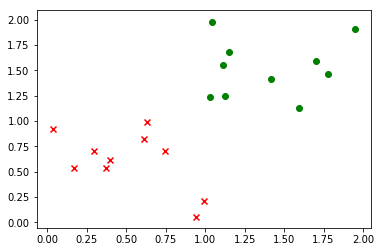

In [2]:
n_features = 2
data_a = np.random.rand(10, n_features)
data_b = np.random.rand(10, n_features) + 1

plt.scatter(data_a[:, 0], data_a[:, 1], c='r', marker='x')
plt.scatter(data_b[:, 0], data_b[:, 1], c='g', marker='o')

In [3]:
data_a_plc = tf.placeholder(dtype=tf.float32, 
                            shape=[None, n_features])
data_b_plc = tf.placeholder(dtype=tf.float32, 
                            shape=[None, n_features])

def get_scores(x):
    layers = [x]
    layer_sizes = [n_features, 10, 5, 1]
    for layer_idx in range(len(layer_sizes) - 1):
        source_size = layer_sizes[layer_idx]
        target_size = layer_sizes[layer_idx + 1]

        w = tf.get_variable(name='weight_{}'.format(layer_idx),
                            shape=[source_size, target_size],
                            initializer=tf.random_normal_initializer())
        b = tf.get_variable(name='bias_{}'.format(layer_idx),
                            shape=[target_size],
                            initializer=tf.constant_initializer(0.0))
        h = tf.nn.relu(tf.nn.xw_plus_b(layers[-1], w, b), 
                       name='layer_{}'.format(layer_idx))
        layers.append(h)

    return layers[-1]

with tf.variable_scope("scores"):
    scores_a = get_scores(data_a_plc)
    
with tf.variable_scope("scores", reuse=True):
    scores_b = get_scores(data_b_plc)
    
   
sigma = 1.0
cost = tf.reduce_mean(
    tf.log(
        1 + tf.exp(-sigma * (scores_a - scores_b))
    )
)

train_op = tf.train.AdamOptimizer(0.01).minimize(cost)

In [4]:
init_op = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init_op)

In [5]:
grid_size = 10
data_test = []
for x in np.linspace(0., 1., num=grid_size):
    for y in np.linspace(0., 1., num=grid_size):
        data_test.append([x, y])

In [6]:
def visualize_results():
    plt.figure()
    scores_test = sess.run(scores_a, feed_dict={data_a_plc: data_test})
    scores_img = np.reshape(scores_test, [grid_size, grid_size])
    plt.imshow(scores_img, origin='lower')
    plt.colorbar()

0. 3.9353301525115967
1. 3.5899276733398438
2. 3.2409753799438477
3. 2.919987201690674
4. 2.66825008392334


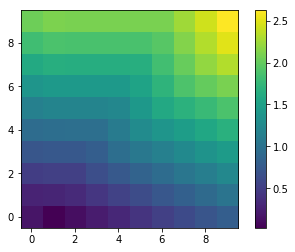

In [7]:
for epoch in range(5):
    _, cost_val = sess.run([train_op, cost], feed_dict={data_a_plc: data_a, data_b_plc: data_b})
    print('{}. {}'.format(epoch, cost_val))
visualize_results()